# Olympics Data Analysis

**Files included:**

- `Olympics_Data_Analysis.ipynb` (this notebook)


**Dataset:** Summer Olympics medal winners (1976–2008).

Place the CSV in the same folder as this notebook and name it:

`summer_olympic.csv`

---


In [112]:
# Setup: imports and path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report




In [113]:
df=pd.read_csv('summer_olympic.csv',encoding='latin1')
df.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze


## Data cleaning & preprocessing
- Inspect missing values, drop unused columns, and set proper dtypes.

In [114]:
# Basic info
df.info()
print("\nMissing values per column:\n", df.isnull().sum())

# Drop columns that are redundant for many analyses (optional)
drop_cols = [c for c in ['Event_gender', 'Country_Code'] if c in df.columns]
if drop_cols:
    df = df.drop(columns=drop_cols)
    print("Dropped columns:", drop_cols)

# Drop rows that are fully empty
df = df.dropna(how='all')

# Clean 'Year' to integer if possible
if 'Year' in df.columns:
    df['Year'] = pd.to_numeric(df['Year'], errors='coerce').astype('Int64')
    if df['Year'].isnull().any():
        print("Warning: Some Year values could not be parsed. They are set to <NA>.")

# Standardize column names
df.columns = df.columns.str.strip()

# Show cleaned info and sample
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15433 entries, 0 to 15432
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          15316 non-null  object 
 1   Year          15316 non-null  float64
 2   Sport         15316 non-null  object 
 3   Discipline    15316 non-null  object 
 4   Event         15316 non-null  object 
 5   Athlete       15316 non-null  object 
 6   Gender        15316 non-null  object 
 7   Country_Code  15316 non-null  object 
 8   Country       15316 non-null  object 
 9   Event_gender  15316 non-null  object 
 10  Medal         15316 non-null  object 
dtypes: float64(1), object(10)
memory usage: 1.3+ MB

Missing values per column:
 City            117
Year            117
Sport           117
Discipline      117
Event           117
Athlete         117
Gender          117
Country_Code    117
Country         117
Event_gender    117
Medal           117
dtype: int64
Dropped columns: 

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country,Medal
0,Montreal,1976,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,East Germany,Silver
1,Montreal,1976,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,Soviet Union,Bronze
2,Montreal,1976,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,United States,Gold
3,Montreal,1976,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,Italy,Silver
4,Montreal,1976,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,United States,Bronze


## Exploratory Data Analysis (EDA)

### Top countries by total medals

In [115]:
# Top N countries by medal *counts* (counts people who received medals)
top_countries = df.groupby('Country')['Medal'].count().sort_values(ascending=False).head(10)
top_countries = top_countries.reset_index().rename(columns={'Medal':'Medal_Count'})
top_countries


,Country,Medal_Count
0,United States,1992
1,Soviet Union,1021
2,Australia,798
3,Germany,691
4,China,679
5,Russia,638
6,East Germany,626
7,Italy,486
8,Romania,482
9,United Kingdom,467


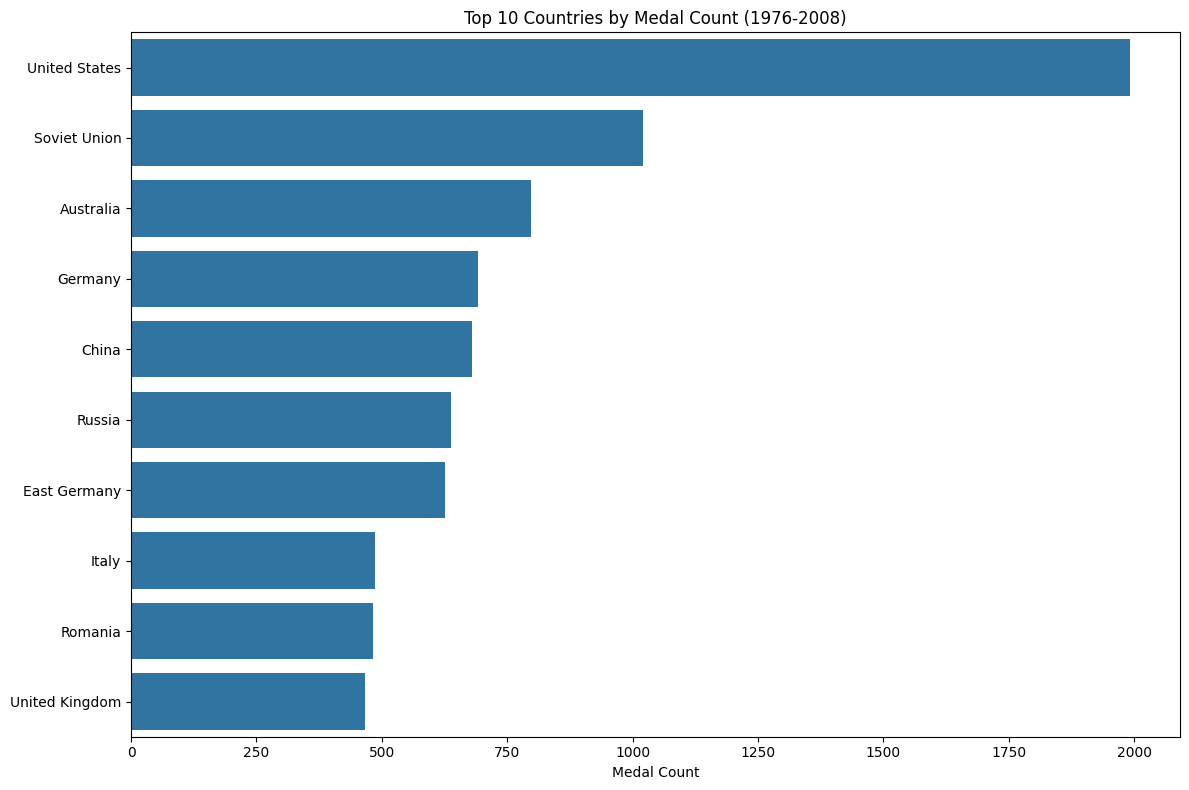

In [116]:
# Plot: Top countries (matplotlib/seaborn)
plt.figure(figsize=(12,8))
sns.barplot(data=top_countries, x='Medal_Count', y='Country')
plt.title("Top 10 Countries by Medal Count (1976-2008)")
plt.xlabel("Medal Count")
plt.ylabel("")
plt.tight_layout()
plt.show()


### Medal trend over years

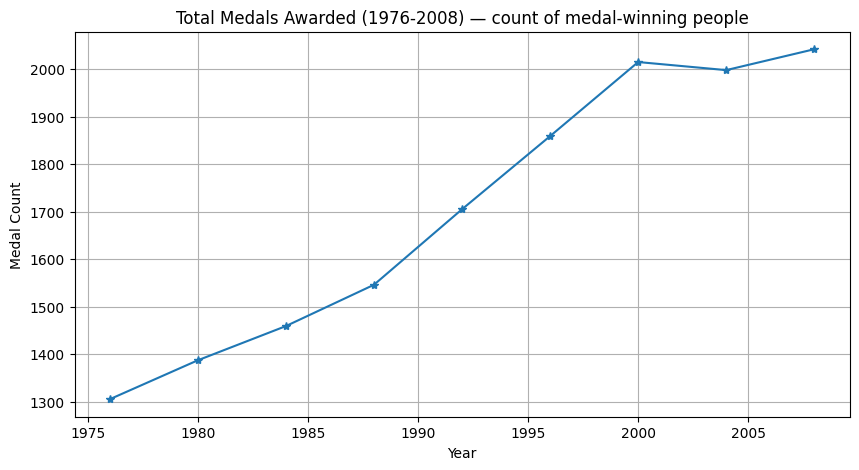

In [117]:
# Medals over years (counts of medal-winning people)
medals_by_year = df.groupby('Year')['Medal'].count().reset_index()
plt.figure(figsize=(10,5))
plt.plot(medals_by_year['Year'], medals_by_year['Medal'], marker='*')
plt.title("Total Medals Awarded (1976-2008) — count of medal-winning people")
plt.xlabel("Year")
plt.ylabel("Medal Count")
plt.grid(True)
plt.show()


### Gender distribution

Gender
Men      9388
Women    5928
Name: count, dtype: int64


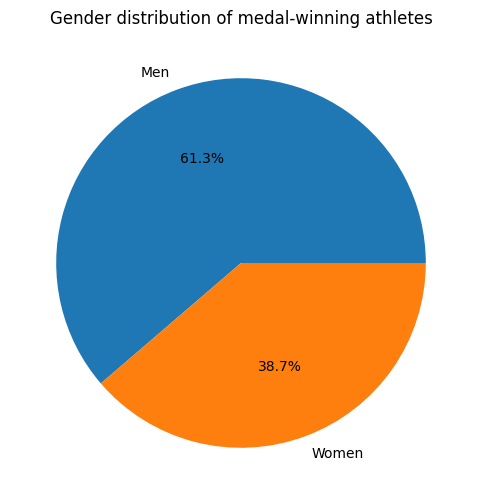

In [118]:
# Gender distribution
if 'Gender' in df.columns:
    gender_counts = df['Gender'].fillna('Unknown').value_counts()
    print(gender_counts)
    plt.figure(figsize=(6,6))
    gender_counts.plot(kind='pie', autopct='%1.1f%%')
    plt.ylabel('')
    plt.title('Gender distribution of medal-winning athletes')
    plt.show()
else:
    print("No 'Gender' column found.")


### Top athletes by medal count

In [119]:
# Top athletes
top_athletes = df.groupby('Athlete')['Medal'].count().sort_values(ascending=False).head(10)
top_athletes = top_athletes.reset_index().rename(columns={'Medal':'Medal_Count'})
top_athletes


,Athlete,Medal_Count
0,"PHELPS, Michael",16
1,"FISCHER, Birgit",12
2,"NEMOV, Alexei",12
3,"TORRES, Dara",12
4,"THOMPSON, Jenny",12
5,"ANDRIANOV, Nikolay",12
6,"COUGHLIN, Natalie",11
7,"BIONDI, Matthew",11
8,"DITYATIN, Aleksandr",10
9,"SCHERBO, Vitaly",10


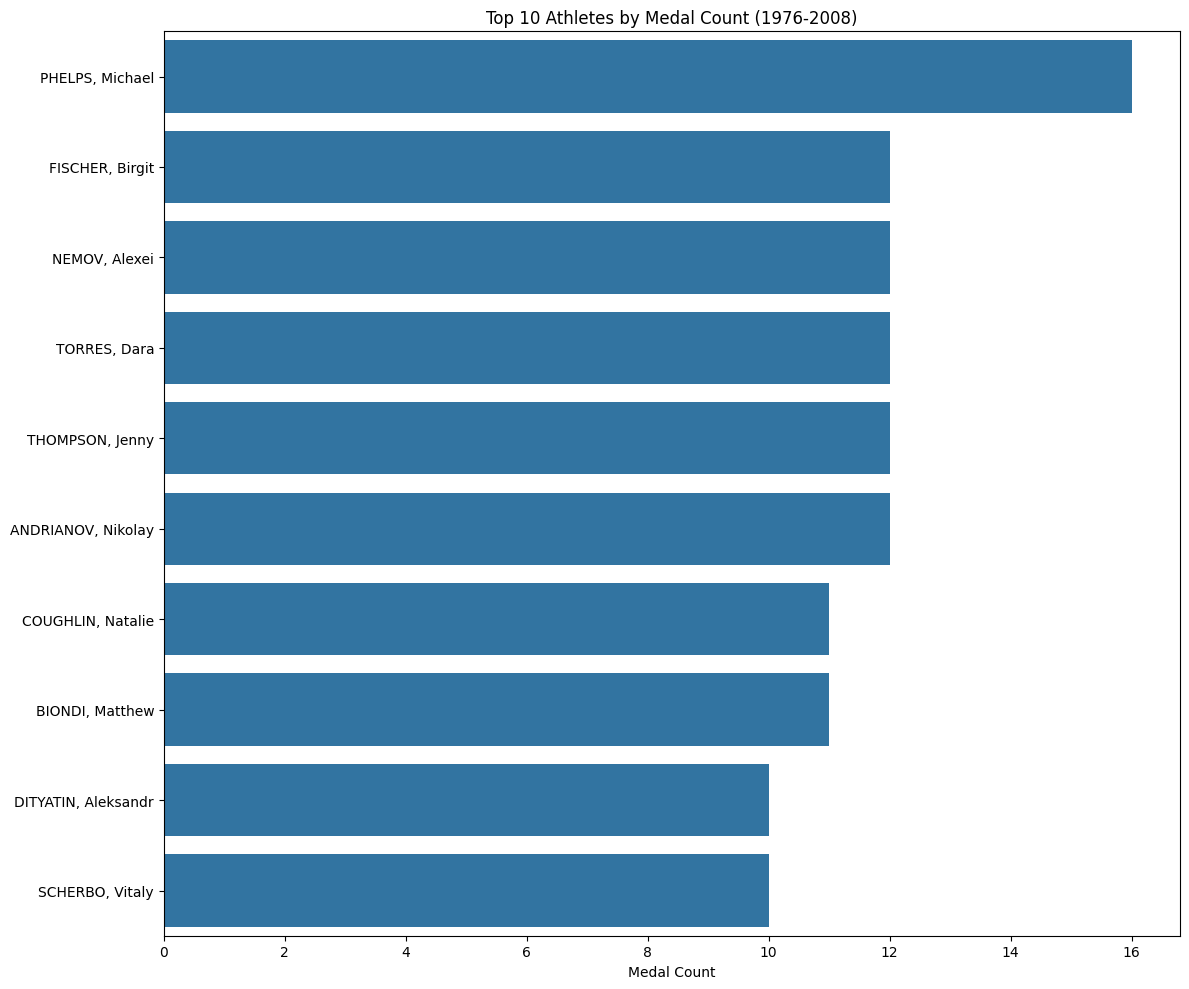

In [120]:
plt.figure(figsize=(12,10))
sns.barplot(data=top_athletes, x='Medal_Count', y='Athlete')
plt.title("Top 10 Athletes by Medal Count (1976-2008)")
plt.xlabel("Medal Count")
plt.ylabel("")
plt.tight_layout()
plt.show()


### Sports and unique events

In [121]:
# Unique events by sport
if {'Sport','Discipline','Event'} <= set(df.columns):
    unique_events = df[['Sport','Discipline','Event']].drop_duplicates()
    sport_event_counts = unique_events.groupby('Sport').size().sort_values(ascending=False)
    sport_event_counts = sport_event_counts.reset_index().rename(columns={0:'Unique_Event_Count'})
    sport_event_counts.head(20)
else:
    print("Missing expected columns for event counting.")

sport_event_counts.head(10)

,Sport,Unique_Event_Count
0,Wrestling,56
1,Weightlifting,35
2,Judo,32
3,Athletics,30
4,Aquatics,26
5,Sailing,20
6,Cycling,19
7,Shooting,18
8,Boxing,17
9,Canoe / Kayak,13


### Country dominance by sport (top 3 per sport)

In [122]:
# For each sport, show top 3 countries by medal counts
dominance = df.groupby(['Sport','Country'])['Medal'].count().reset_index(name='Count')
dominance = dominance.sort_values(['Sport','Count'], ascending=[True, False])
# Show a sample for a few sports
for s in dominance['Sport'].unique()[:8]:
    print('\nSport:', s)
    display(dominance[dominance['Sport']==s].head(3))



Sport: Aquatics


,Sport,Country,Count
43,Aquatics,United States,578
1,Aquatics,Australia,239
28,Aquatics,Russia,125



Sport: Archery


,Sport,Country,Count
56,Archery,"Korea, South",52
67,Archery,United States,19
49,Archery,China,15



Sport: Athletics


,Sport,Country,Count
142,Athletics,United States,299
128,Athletics,Soviet Union,115
90,Athletics,East Germany,107



Sport: Badminton


,Sport,Country,Count
145,Badminton,China,47
148,Badminton,"Korea, South",31
147,Badminton,Indonesia,26



Sport: Baseball


,Sport,Country,Count
153,Baseball,Cuba,111
157,Baseball,United States,68
154,Baseball,Japan,64



Sport: Basketball


,Sport,Country,Count
172,Basketball,United States,192
173,Basketball,Yugoslavia,84
169,Basketball,Soviet Union,72



Sport: Boxing


,Sport,Country,Count
186,Boxing,Cuba,56
232,Boxing,United States,42
219,Boxing,Russia,20



Sport: Canoe / Kayak


,Sport,Country,Count
251,Canoe / Kayak,Germany,96
252,Canoe / Kayak,Hungary,93
248,Canoe / Kayak,East Germany,44


### Athletes who won medals in more than one sport

In [123]:
athlete_sports = df[['Athlete','Sport']].drop_duplicates().groupby('Athlete').agg({'Sport':lambda x: list(x)})
multi_sport_athletes = athlete_sports[athlete_sports['Sport'].map(len) > 1]
multi_sport_athletes = multi_sport_athletes.reset_index().rename(columns={'Sport':'Sports_List'})
multi_sport_athletes.head(30)


,Athlete,Sports_List
0,"BELOVA, Irina","[Athletics, Gymnastics]"
1,"CHEN, Jing","[Table Tennis, Volleyball]"
2,"DIMITROV, Stefan","[Volleyball, Weightlifting]"
3,"GAVRILOV, Yuri","[Football, Handball]"
4,"GONZALEZ, Raul","[Athletics, Handball]"
5,"KOLESNIKOV, Nikolai","[Athletics, Weightlifting]"
6,"KOVACS, Istvan","[Wrestling, Boxing]"
7,"KOVALENKO, Alexandre","[Athletics, Aquatics]"
8,"KUZNETSOV, Mikhail","[Rowing, Canoe / Kayak]"
9,"KUZNETSOV, Nikolai","[Rowing, Cycling]"


## Interactive Visualizations (Plotly)

Top 20 countries — interactive bar chart

In [124]:
fig = px.bar(top_countries.head(20), x='Country', y='Medal_Count',
             title='Top 20 Countries by Medal Count (interactive)',
             hover_data=['Medal_Count'])
fig.update_layout(xaxis_tickangle=-45, height=500)
fig.show()


### Country performance over time (select countries)

In [125]:
# Pivot to have yearly counts per country (this counts people who received medals)
year_country = df.groupby(['Year','Country'])['Medal'].count().reset_index(name='Count')
pivot = year_country.pivot(index='Year', columns='Country', values='Count').fillna(0)
# Choose a few countries automatically (top 6 overall)
top6 = top_countries['Country'].head(6).tolist()
pivot_sub = pivot[top6]
fig = px.line(pivot_sub.reset_index(), x='Year', y=top6, title='Yearly medal counts for top countries')
fig.show()


## Predictive Modeling — Logistic Regression

This creates a sample binary target: 'Gold' vs others. It's illustrative; rows are medal-winning people.

In [126]:
# Create a binary target: Gold (1) vs Silver/Bronze/other (0)
df_model = df.copy()
df_model['target_gold'] = (df_model['Medal'].astype(str).str.strip() == 'Gold').astype(int)

# Features: Sport, Gender, Country (encode)
features = [c for c in ['Sport','Gender','Country'] if c in df_model.columns]
X = df_model[features].fillna('Unknown').astype(str)
y = df_model['target_gold']

# Encode and train
le_dict = {}
X_enc = pd.DataFrame()
for col in X.columns:
    le = LabelEncoder()
    X_enc[col] = le.fit_transform(X[col])
    le_dict[col] = le

X_train, X_test, y_train, y_test = train_test_split(X_enc, y, test_size=0.3, random_state=42, stratify=y)
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6707290533188248

Confusion matrix:
 [[3082    0]
 [1513    0]]

Classification report:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80      3082
           1       0.00      0.00      0.00      1513

    accuracy                           0.67      4595
   macro avg       0.34      0.50      0.40      4595
weighted avg       0.45      0.67      0.54      4595



c:\Users\Lenovo\.conda\inpython\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\Lenovo\.conda\inpython\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\Lenovo\.conda\inpython\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



## Summary & Conclusions

- This notebook performed EDA, visualizations, and a sample logistic regression model.
- Notes:
  - The dataset rows count medal-winning people (so team sports multiply counts).
  - For official medal tallies, aggregate at the event level rather than per-person counts.
